In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import knn as kalmann
from load import load_bikes_data,load_abalone_data,load_wine_data
from tqdm import tqdm 
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150

##  Load Data

In [4]:
X,y = load_bikes_data()
print(X.shape)
print(y.shape)

(17379, 14)
(17379,)


## Preprocess Data

In [5]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

## Partition Dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=.5)
X_val,X_test, y_val,y_test = train_test_split(X_test,y_test,test_size=0.5)
print(f'Train Shape: {X_train.shape}')
print(f'Validation Shape: {X_val.shape}')
print(f'Test shape: {X_test.shape}')

Train Shape: (8689, 14)
Validation Shape: (4345, 14)
Test shape: (4345, 14)


## Create EKF network 

In [15]:
n_inputs = X_train.shape[1]

knn_ekf = kalmann.KNN(nu=n_inputs, ny=1, nl=10, neuron='relu')


In [16]:
nepochs = 100
tolerance = 1e-4
patience = 20
P = 100
Q = 10e-16
R = 10
RMS,_=knn_ekf.train(nepochs=nepochs, U=X_train, Y=y_train, 
                    U_val=X_val,Y_val=y_val, method='ekf', 
                    P=P, Q=Q, R=R,
                    tolerance=tolerance,patience=patience)


Training...



Training complete!




## Test Error

In [17]:
# y_pred= knn_ekf.classify(X_test,high=29,low=1)
y_pred = knn_ekf.feedforward(X_test)
error = mean_squared_error(y_test,y_pred)
test_error = np.sqrt(error)
print(f"The test error for the model is {test_error:.6f}")

The test error for the model is 0.016645


## Plotting RMS decrease

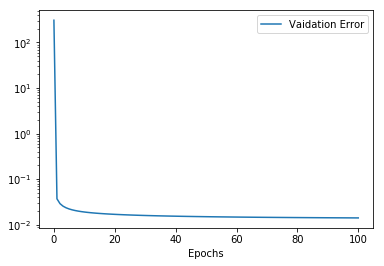

In [18]:
plt.plot(range(len(RMS)),RMS,label="Vaidation Error")
plt.xlabel("Epochs")
plt.legend()
plt.yscale('log')

## Save file 

In [103]:
knn_ekf.save("saved_models/winequality/efk")